In [163]:
import pandas as pd
data=pd.read_csv('abalone.csv')

In [164]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [165]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [166]:
datas=pd.get_dummies(data,columns=['Sex']).astype(float)

In [167]:
datas

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,1.0,0.0,0.0


In [168]:
YY=datas.iloc[:,7].values

In [169]:
YY

array([15.,  7.,  9., ...,  9., 10., 12.])

In [170]:
XX=datas.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9]].values

In [171]:
XX

array([[0.455, 0.365, 0.095, ..., 0.15 , 0.   , 0.   ],
       [0.35 , 0.265, 0.09 , ..., 0.07 , 0.   , 0.   ],
       [0.53 , 0.42 , 0.135, ..., 0.21 , 1.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.308, 0.   , 0.   ],
       [0.625, 0.485, 0.15 , ..., 0.296, 1.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.495, 0.   , 0.   ]])

In [172]:
from sklearn.svm import SVR

In [173]:
model=SVR(kernel='rbf')

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test=train_test_split(XX,YY,test_size=0.2,random_state=42)

In [176]:
model.fit(x_train,y_train)

SVR()

In [177]:
y_pred=model.predict(x_test)

In [178]:
from sklearn.metrics import r2_score

In [179]:
print(r2_score(y_test,y_pred))

0.5185776834308968


In [180]:
y_test.shape

(836,)

In [181]:
import matplotlib.pyplot as plt


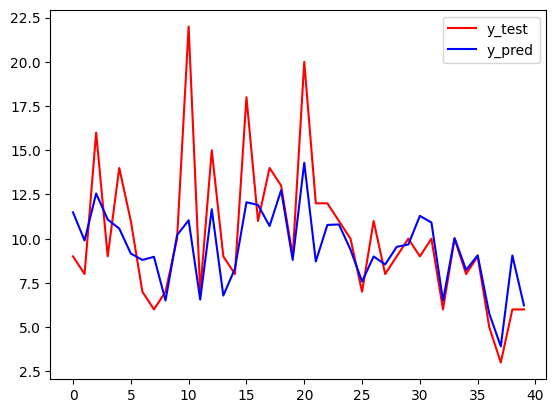

In [183]:
plt.plot(y_test[0:40],color='r',label='y_test')
plt.plot(y_pred[0:40],color='b',label='y_pred')
plt.legend()


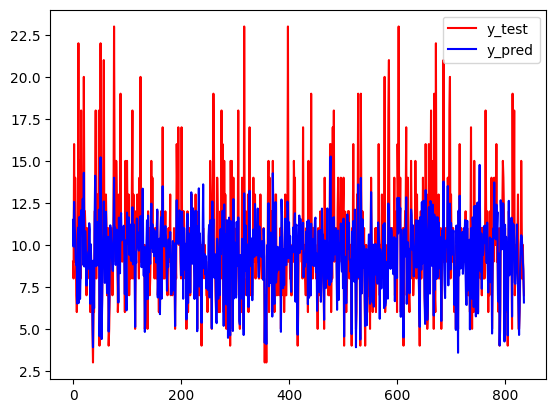

In [182]:
plt.plot(y_test,color='r',label='y_test')
plt.plot(y_pred,color='b',label='y_pred')
plt.legend()

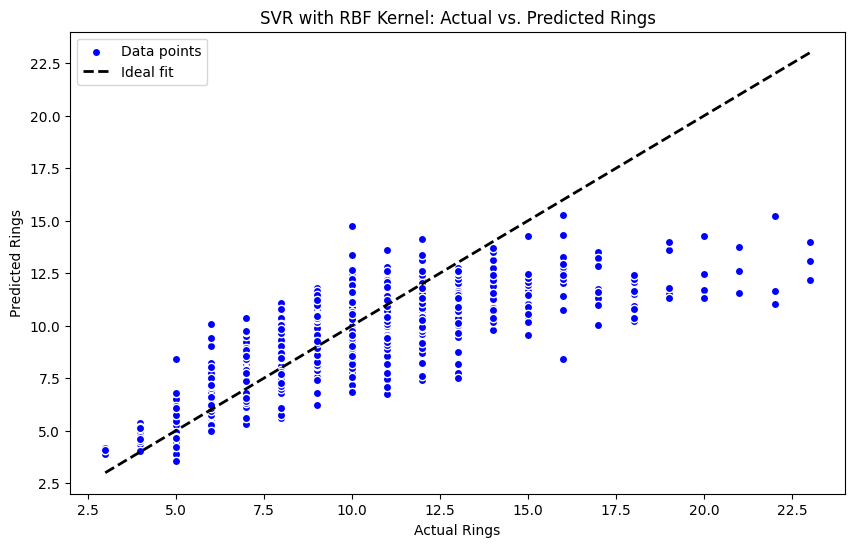

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', label='Data points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal fit')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('SVR with RBF Kernel: Actual vs. Predicted Rings')
plt.legend()
plt.show()

In [134]:
y_pred.shape

(836,)

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
mod=LinearRegression()

In [137]:
mod.fit(x_train,y_train)

LinearRegression()

In [138]:
y_pred=mod.predict(x_test)

In [139]:
r2_score(y_test,y_pred)

0.5481628137889263